In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit,fsolve
from scipy.interpolate import interp1d
from numpy.polynomial import polynomial as poly

In [4]:
plt.rcParams['text.usetex'] = True

In [5]:
def get_values(filename):
    val_df = pd.read_csv(filename)
    val = np.transpose(val_df.to_numpy())
    return val

<h1>Two point function:</h1>

In [3]:
tpf_df = pd.read_csv('two_point_func_data_40_zoom_ex.csv')
tpf = np.transpose(tpf_df.to_numpy())
print(tpf)

[[ 1.        2.        3.        4.        5.        6.        7.
   8.        9.       10.       11.       12.       13.       14.
  15.       16.       17.       18.       19.       20.      ]
 [ 0.999319  0.738759  0.649339  0.608599  0.585139  0.566039  0.553959
   0.546019  0.540259  0.536119  0.529679  0.527159  0.525139  0.522119
   0.519839  0.519099  0.519159  0.515679  0.515239  0.516159]]


In [4]:
def tpf_fit(x,a,b):
    return np.exp(-x/40)*x**b

In [5]:
popt,pcov = curve_fit(tpf_fit,tpf[0][5:10],tpf[1][5:10])

C:\users\mainak\appdata\local\programs\python\python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [6]:
print(popt)

[ 1.         -0.19491438]


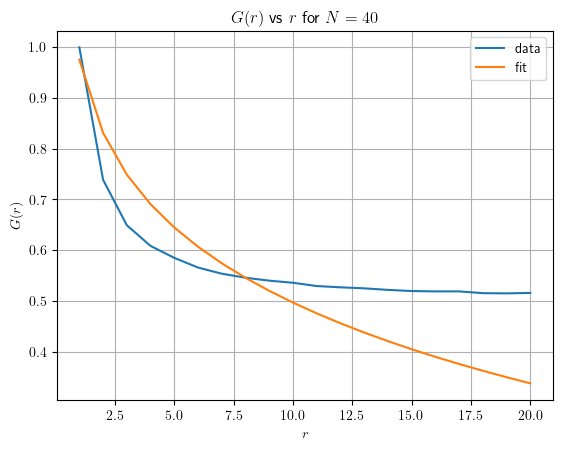

In [7]:
plt.plot(tpf[0][:],tpf[1][:],label='data')
plt.plot(tpf[0][:],tpf_fit(tpf[0][:],*popt),label='fit')
plt.xlabel(r'$r$')
plt.ylabel(r'$G(r)$')
plt.title(r'$G(r)$ vs $r$ for $N=40$')
plt.grid(True,which='both')
plt.legend()
plt.show()

In [8]:
res = linregress(np.log(tpf[0][0:8]),np.log(tpf[1][0:8]))
print(res.slope)
print(res.intercept)

-0.2828934642679017
-0.0665815259571983


-0.10147110452238012


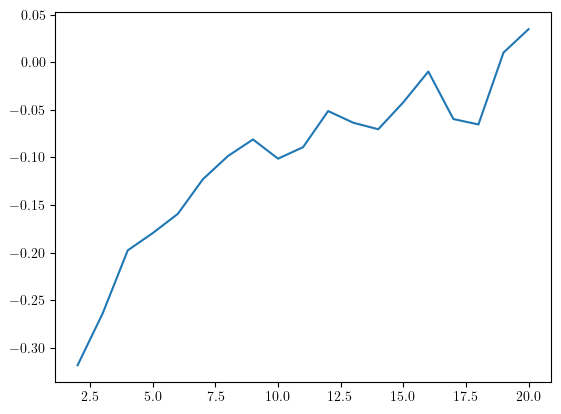

In [9]:
plt.plot(tpf[0][1:],np.gradient(np.log(tpf[1][1:]),np.log(tpf[0][1:])))
print(np.mean(np.gradient(np.log(tpf[1][1:]),np.log(tpf[0][1:]))))

<h1>Calculating $T_c$  and critical exponents using finite size scaling:</h1>

In [114]:
def fssa(Ls,Ts,ys,Tc_g,v_g,e_g,l_b,r_b,min_points,make_plot=False):
    xLs = np.array([(L**(1/v_g))*(T-Tc_g)/Tc_g for L,T in zip(Ls,Ts)])
    yLs = np.array([(L**(e_g/v_g))*y for L,y in zip(Ls,ys)])
    xLs_f_un = xLs.flatten()
    yLs_f_un = yLs.flatten()
    xLs_f,yLs_f = np.transpose([[x,y] for x,y in zip(xLs_f_un,yLs_f_un) if l_b<x<r_b])
    if xLs_f.shape[0] < min_points:
        return np.array([])
    xLs_fs = np.sort(xLs_f)
    yLs_fs = yLs_f[np.argsort(xLs_f)]
    fitted,stats = poly.Polynomial.fit(xLs_f,yLs_f,4,domain=[np.min(xLs_f),np.max(xLs_f)],full=True)
    if make_plot:
        plt.scatter(xLs_f,yLs_f,c='red',label='Collapsed data')
        plt.plot(xLs_fs,fitted(xLs_fs),c='blue',label=r'$4^{th}$ order poly fit')
        plt.xlabel(r'$\tau L^{1 / \nu}$')
        plt.ylabel(r'$\tau L^{\xi / \nu}$')
        plt.grid()
        plt.legend()
    return stats[0]/xLs_f.shape[0]

In [79]:
def search(Ls,Ts,ys,Tc_b,v_b,e_b,num_points,t_b,min_points):
    Tc_g = np.linspace(Tc_b[0],Tc_b[1],num=num_points,endpoint=False)
    v_g = np.linspace(v_b[0],v_b[1],num=num_points,endpoint=False)
    e_g = np.linspace(e_b[0],e_b[1],num=num_points,endpoint=False)
    Tc_est,v_est,e_est = None,None,None
    min_rss = 1e9
    for Tc in Tc_g:
        for v in v_g:
            for e in e_g:
                rss = fssa(Ls,Ts,ys,Tc,v,e,t_b[0],t_b[1],min_points)
                if rss.size == 0:
                    continue
                if rss[0] < min_rss:
                    Tc_est,v_est,e_est = Tc,v,e
                    min_rss = rss[0]
    return Tc_est,v_est,e_est,min_rss
    # _ = fssa(Ls,Ts,ys,Tc_est,v_est,gamma_est,l_b,r_b,min_points,make_plot=True)

In [113]:
#Common search parameters
Ls = [16,25,40]
Tc_b = (1.1,1.2)
v_b = (0.9,1.1)

<h2>Magnetisation:</h2>

In [90]:
mag_16_zoom = get_values('magnetisation_data_16_zoom_ex.csv')
mag_25_zoom = get_values('magnetisation_data_25_zoom_ex.csv')
mag_40_zoom = get_values('magnetisation_data_40_zoom_ex.csv')

[0.8  0.82 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06
 1.08 1.1  1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3 ]


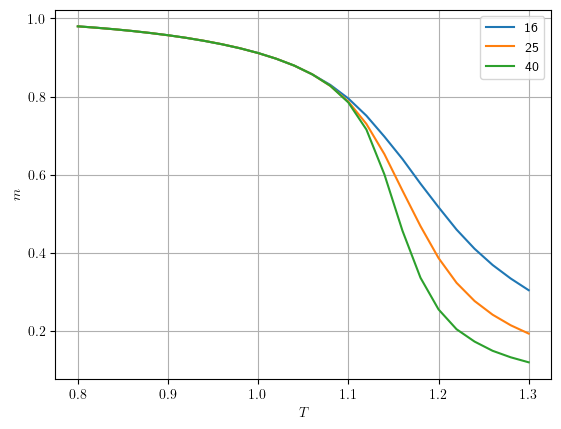

In [91]:
print(mag_16_zoom[0])
plt.plot(mag_16_zoom[0],mag_16_zoom[1],label='16')
plt.plot(mag_25_zoom[0],mag_25_zoom[1],label='25')
plt.plot(mag_40_zoom[0],mag_40_zoom[1],label='40')
plt.xlabel('$T$')
plt.ylabel(r'$m$')
plt.legend()
plt.grid(True,which='both')
plt.show()

In [115]:
mag_Ts = [mag_16_zoom[0],mag_25_zoom[0],mag_40_zoom[0]]
mag_ys = [mag_16_zoom[1],mag_25_zoom[1],mag_40_zoom[1]]
beta_b = (0,0.5)
mag_t_b = (0,2)
min_points = 10
num_points = 50
search(Ls,mag_Ts,mag_ys,Tc_b,v_b,beta_b,num_points,mag_t_b,min_points)

(1.1340000000000001, 0.936, 0.11, 9.174000753115796e-07)

<h2>Susceptibility:</h2>

In [78]:
sus_16_zoom = get_values('susceptibility_data_16_zoom_ex.csv')
sus_25_zoom = get_values('susceptibility_data_25_zoom_ex.csv')
sus_40_zoom = get_values('susceptibility_data_40_zoom_ex.csv')

[0.8  0.82 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06
 1.08 1.1  1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3 ]


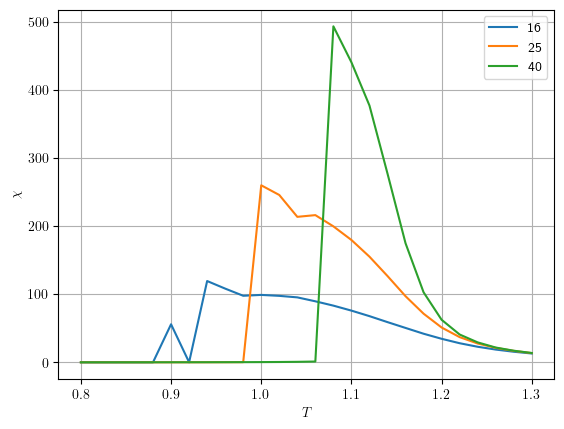

In [74]:
print(sus_16_zoom[0])
plt.plot(sus_16_zoom[0],sus_16_zoom[1],label='16')
plt.plot(sus_25_zoom[0],sus_25_zoom[1],label='25')
plt.plot(sus_40_zoom[0],sus_40_zoom[1],label='40')
plt.xlabel('$T$')
plt.ylabel(r'$\chi$')
plt.legend()
plt.grid(True,which='both')
plt.show()

In [116]:
sus_Ts = [sus_16_zoom[0],sus_25_zoom[0],sus_40_zoom[0]]
sus_ys = [sus_16_zoom[1],sus_25_zoom[1],sus_40_zoom[1]]
gamma_b = (-1.6,-1.8)
sus_t_b = (0,2)
min_points = 10
num_points = 50
search(Ls,sus_Ts,sus_ys,Tc_b,v_b,gamma_b,num_points,sus_t_b,min_points)

(1.1340000000000001, 0.98, -1.732, 2.763896211278057e-07)

<h2>Specific heat:</h2>

In [121]:
sh_16_zoom = get_values('specific_heat_data_16_zoom_ex.csv')
sh_25_zoom = get_values('specific_heat_data_25_zoom_ex.csv')
sh_40_zoom = get_values('specific_heat_data_40_zoom_ex.csv')

[0.8  0.82 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06
 1.08 1.1  1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3 ]


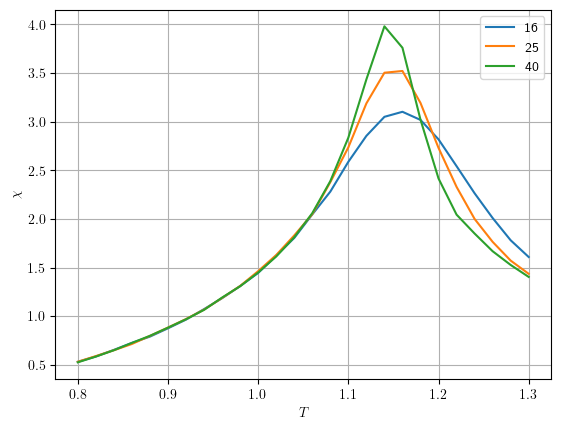

In [122]:
print(sh_16_zoom[0])
plt.plot(sh_16_zoom[0],sh_16_zoom[1],label='16')
plt.plot(sh_25_zoom[0],sh_25_zoom[1],label='25')
plt.plot(sh_40_zoom[0],sh_40_zoom[1],label='40')
plt.xlabel('$T$')
plt.ylabel(r'$\chi$')
plt.legend()
plt.grid(True,which='both')
plt.show()

In [123]:
sh_Ts = [sh_16_zoom[0],sh_25_zoom[0],sh_40_zoom[0]]
sh_ys = [sh_16_zoom[1],sh_25_zoom[1],sh_40_zoom[1]]
alpha_b = (-0.5,0.5)
sh_t_b = (0,1)
min_points = 10
num_points = 50
search(Ls,sh_Ts,sh_ys,Tc_b,v_b,alpha_b,num_points,sh_t_b,min_points)

(1.1340000000000001, 1.096, -0.32, 5.154862476946181e-05)

<h1>Q5</h1>

In [7]:
def ce_fit(x,a,b):
    return a*x+b

<h2>Susceptibility:</h2>

In [ ]:
def cef_fit(x,a,b):
    return a*x**b

In [ ]:
gamma = 7/4

In [ ]:
sus_40 = get_values('susceptibility_data_40_zoom_cr.csv')
plt.plot(sus_40[0],sus_40[1])
plt.show()

In [ ]:
sus_40_rt = (sus_40[0]-1.13)/1.13
print(sus_40_rt[20:])
plt.scatter(np.log(sus_40_rt[14:]),np.log(sus_40[1][14:]))
# plt.scatter(sus_40_rt[1:],sus_40[1][1:])
popt,pcov=curve_fit(cef_fit,sus_40_rt[14:],sus_40[1][14:])
print(popt)
# plt.plot(sus_40_rt[1:],cef_fit(sus_40_rt[1:],*popt))
plt.grid(True,which='both')

<h2>Magnetisation:</h2>

In [ ]:
beta = 1/8

In [ ]:
mag_40 = get_values('magnetisation_data_40_zoom_cr.csv')
plt.plot(mag_40[0],mag_40[1])

In [ ]:
mag_40_rt = (mag_40[0]-1.13)/1.13
plt.scatter(-mag_40_rt[:13],mag_40[1][:13])
print(-mag_40_rt[:13])
popt,pcov=curve_fit(cef_fit,-mag_40_rt[:13],mag_40[1][10:13])
print(popt)
plt.plot(-mag_40_rt[:13],cef_fit(-mag_40_rt[:13],*popt))
plt.grid(True,which='both')

<h2>Specific heat:</h2>

In [ ]:
alpha = 0

In [ ]:
sh_40 = get_values('specific_heat_data_40_zoom_cr.csv')
plt.plot(sh_40[0],sh_40[1])

In [ ]:
sh_40_rt = (sh_40[0]-1.13)/1.13
# plt.loglog(sh_40_rt[14:],sh_40[1][14:])
plt.scatter(np.log(sh_40_rt[14:]),np.log(sh_40[1][14:]))
print(sh_40_rt[14:17])
popt,pcov=curve_fit(ce_fit,np.log(sh_40_rt[20:]),np.log(sh_40[1][20:]))
print(popt)
plt.grid(True,which='both')

<h1>Calculating $T_c$ using Binder cumulant:</h1>

In [ ]:
bc_16 = get_values('binder_cumulant_data_16_zoom.csv')
bc_25 = get_values('binder_cumulant_data_25_zoom.csv')
bc_40 = get_values('binder_cumulant_data_40_zoom.csv')

In [ ]:
plt.plot(bc_16[0][:20],1.5*(1-bc_16[1][:20]/3),label='16')
plt.plot(bc_25[0][:20],1.5*(1-bc_25[1][:20]/3),label='25')
plt.plot(bc_40[0][:20],1.5*(1-bc_40[1][:20]/3),label='40')
plt.grid()
plt.legend()
plt.show()

In [ ]:
interp_16 = interp1d(bc_16[0],bc_16[1])
interp_25 = interp1d(bc_25[0],bc_25[1])
interp_40 = interp1d(bc_40[0],bc_40[1])

In [ ]:
def difference(x,spl1,spl2):
    return np.abs(spl1(x)-spl2(x))

In [ ]:
Tc_16_25 = fsolve(difference,1.13,(interp_16,interp_25),maxfev=1000)
Tc_25_40 = fsolve(difference,1.13,(interp_25,interp_40),maxfev=1000)
Tc_16_40 = fsolve(difference,1.13,(interp_16,interp_40),maxfev=1000)

In [ ]:
Tc_est = np.mean([Tc_16_25,Tc_25_40,Tc_16_40])
print(Tc_est)